In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rn50 = pd.read_csv("RN50.csv")
rn101 = pd.read_csv("RN101.csv")
vit16 = pd.read_csv("ViT-B-16.csv")
vit32 = pd.read_csv("ViT-B-32.csv")

In [14]:
rn50[rn50["num_calib"]==5000]["size"].mean()

4.47574

In [54]:
data1 = pd.DataFrame({"Model": ["rn50", "rn101", "vit16", "vit32"],
                      "size": [rn50[rn50["num_calib"]==5000]["size"].mean(), rn101[rn101["num_calib"]==5000]["size"].mean(),
                               vit16[vit16["num_calib"]==5000]["size"].mean(), vit32[vit32["num_calib"]==5000]["size"].mean()],
                       "coverage": [rn50[rn50["num_calib"]==5000]["coverage"].mean(), rn101[rn101["num_calib"]==5000]["coverage"].mean(),
                                    vit16[vit16["num_calib"]==5000]["coverage"].mean(), vit32[vit32["num_calib"]==5000]["coverage"].mean()],
                       "acc": [rn50[rn50["num_calib"]==5000]["top1"].mean(), rn101[rn101["num_calib"]==5000]["top1"].mean(),
                               vit16[vit16["num_calib"]==5000]["top1"].mean(), vit32[vit32["num_calib"]==5000]["top1"].mean()]},)
data1.to_csv("table1.csv")

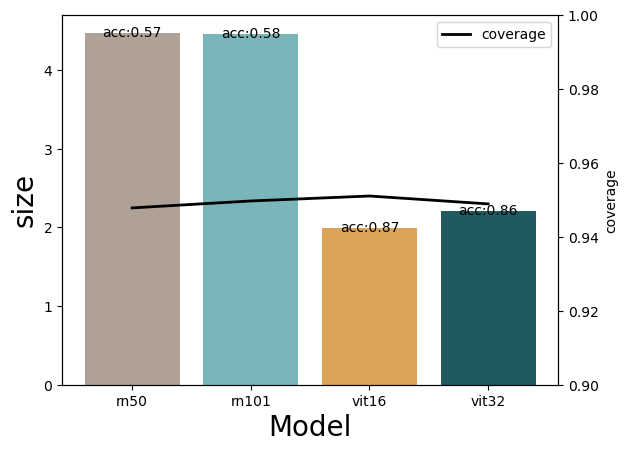

In [73]:
f, ax1 = plt.subplots()
ax1.set_ylabel('average size', fontsize=20)
ax1.set_xlabel('Model', fontsize=20)
sns.barplot(data1, x="Model", y="size", palette=["#B3A192", "#6EBEC4", "#F0A943", "#166168"])
for p, label in zip(ax1.patches, data1['acc']):
    ax1.text(p.get_x() + p.get_width() / 2., p.get_height(), 'acc:{:.2f}'.format(label), ha='center', va='center')

ax2 = ax1.twinx()
sns.lineplot(data1, x="Model", y="coverage", c="black", linewidth=2, label="coverage")
ax2.set_ylim(0.9,1.0)
plt.savefig(f"question1.pdf",format='pdf',bbox_inches = 'tight')

In [18]:
x = [50,100,500,1000,1500,2000]
rn50_2 = {"size": [rn50[rn50["num_calib"]==n]["size"].mean() for n in x],
          "coverage": [rn50[rn50["num_calib"]==n]["coverage"].mean() for n in x]}
rn101_2 = {"size": [rn101[rn101["num_calib"]==n]["size"].mean() for n in x],
           "coverage": [rn101[rn101["num_calib"]==n]["coverage"].mean() for n in x]}
vit16_2 = {"size": [vit16[vit16["num_calib"]==n]["size"].mean() for n in x],
           "coverage": [vit16[vit16["num_calib"]==n]["coverage"].mean() for n in x]} 
vit32_2 = {"size": [vit32[vit32["num_calib"]==n]["size"].mean() for n in x],
           "coverage": [vit32[vit32["num_calib"]==n]["coverage"].mean() for n in x]} 

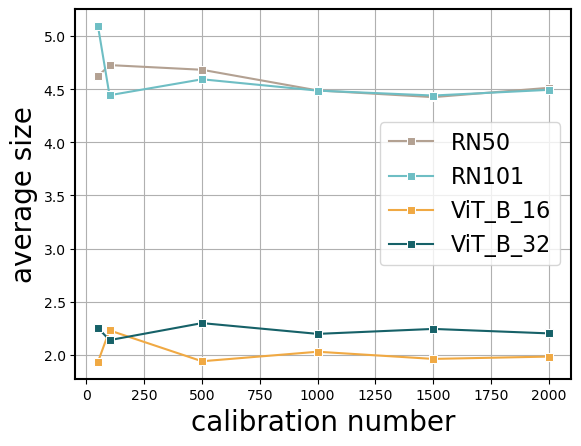

In [21]:
color = ["#B3A192", "#6EBEC4", "#F0A943", "#166168"]
f, ax = plt.subplots()
ax.set_ylabel('average size', fontsize=20)
ax.set_xlabel('calibration number', fontsize=20)
plt.grid(True)
spines = ax.spines
for spine in spines.values():
    spine.set_linewidth(1.5)
sns.lineplot(x=x, y=rn50_2["size"], linewidth=1.5, marker='s', label="RN50", color=color[0])
sns.lineplot(x=x, y=rn101_2["size"], linewidth=1.5, marker='s', label="RN101", color=color[1])
sns.lineplot(x=x, y=vit16_2["size"], linewidth=1.5, marker='s', label="ViT_B_16", color=color[2])
sns.lineplot(x=x, y=vit32_2["size"], linewidth=1.5, marker='s', label="ViT_B_32", color=color[3])
plt.legend(fontsize=16)

plt.savefig(f"question2.1.pdf",format='pdf',bbox_inches = 'tight')

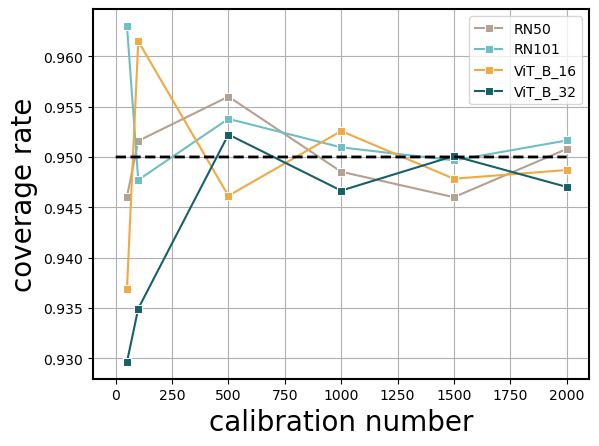

In [22]:
color = ["#B3A192", "#6EBEC4", "#F0A943", "#166168"]
f, ax = plt.subplots()
# ax.set_xlim(0,2000)
ax.set_ylabel('coverage rate', fontsize=20)
ax.set_xlabel('calibration number', fontsize=20)
plt.grid(True)
sns.lineplot(x=x, y=rn50_2["coverage"], linewidth=1.5, marker='s', label="RN50", color=color[0])
sns.lineplot(x=x, y=rn101_2["coverage"], linewidth=1.5, marker='s', label="RN101", color=color[1])
sns.lineplot(x=x, y=vit16_2["coverage"], linewidth=1.5, marker='s', label="ViT_B_16", color=color[2])
sns.lineplot(x=x, y=vit32_2["coverage"], linewidth=1.5, marker='s', label="ViT_B_32", color=color[3])
plt.legend(fontsize=16)

spines = ax.spines
for spine in spines.values():
    spine.set_linewidth(1.5)

x0 = np.linspace(0,2000,10000)
y0 = np.ones_like(x0) * 0.95
sns.lineplot(x=x0, y=y0, color='black', linewidth=2)
ax.lines[4].set_linestyle("--")

plt.savefig(f"question2.2.pdf",format='pdf',bbox_inches = 'tight')